In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [2]:
import sklearn.datasets as dt
digits_dataset = dt.load_digits()

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

Utilize a função **reshape** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [3]:
import numpy as np
digits_img = digits_dataset['images']
digits = np.reshape(digits_img, (1797, 64))
digits_target = digits_dataset['target']

#### Divisão dos dados em grupos para treinamento e teste.

Importe e utilize a função **train_test_split** (do pacote **model_selection**, que percente à biblioteca **sklearn**) para dividir os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split**.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits, digits_target, test_size=0.25)

### Linear Discriminant Analysis (LDA)

#### Treinamento

Importe o classificador do LDA, que é uma função chamada **LinearDiscriminantAnalysis** do pacote **discriminant_analysis**, que faz parte da biblioteca **sklearn**. Então crie o classificador com o nome **LDA** atribundo a ele a função **LinearDiscriminantAnalysis** utilizando **solver='lsqr'**).

Treine o classificador **LDA** por meio de sua própria função **fit()**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(solver='lsqr')
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='lsqr', store_covariance=False, tol=0.0001)

#### Classificação e Resultados

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **LDA**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred_LDA**.

In [6]:
y_pred_LDA = LDA.predict(x_test)

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**, então imprima a acurácia do classificador lda e sua confusion matrix.

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred_LDA))
confusion_matrix(y_test, y_pred_LDA)

0.9333333333333333


array([[34,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 47,  0,  0,  0,  0,  0,  0,  3,  1],
       [ 0,  2, 43,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  1,  0, 41,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 50,  0,  0,  1,  2],
       [ 0,  1,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 46,  2],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  3, 36]], dtype=int64)

### Support Vector Machine (SVM)

#### Treinamento

Importe a função **SVC**, pertencente ao pacote **SVM** da biblioteca **sklearn**, então crie o classificador chamado **SVM**, análogo ao que foi feito com o LDA anteriormente. Utilize os parâmetros **C=1.0**, **kernel='poly'** e **degree=3**.

Então, treine o classificador **SVM** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [8]:
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel='poly', degree=3)
SVM.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### Classificação e Resultados

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **SVM** e armazene os resultados em **y_pred_SVM**.

Na mesma célula, verifique a acurácia do classificador **SVM** por meio da função **accuracy_score** e mostre a matriz de confusão do classificador **SVM** utilizando a função **confusion_matrix**.

In [9]:
y_pred_SVM = SVM.predict(x_test)
print(accuracy_score(y_test, y_pred_SVM))
confusion_matrix(y_test, y_pred_SVM)

0.9866666666666667


array([[34,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 43,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 43,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 51,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  1, 39]], dtype=int64)

### Artificial Neural Networks (ANN)

#### Treinamento

Importe a função **MLPClassifier**, pertencente ao pacote **neural_network** da biblioteca **sklearn**, então crie o classificador **ANN** usando a função importada com os parâmetros **solver='lbfgs'** e **hidden_layer_sizes=(50)**.

Depois, treine o classificador usando os dados de entrada e saída de treinamento.

In [10]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(50))
ANN.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Classificação e Resultados

Faça a predição com base nos dados de entrada de teste com o classificador **ANN**, atribundo as predições à variável **y_pred_ANN**. Então imprima a acurácia e a matriz de confusão dessa classificação.

In [11]:
y_pred_ANN = ANN.predict(x_test)
print(accuracy_score(y_test, y_pred_ANN))
confusion_matrix(y_test, y_pred_ANN)

0.9488888888888889


array([[32,  0,  0,  0,  0,  2,  1,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 46,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 40,  0,  0,  0,  1,  0,  2],
       [ 0,  0,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  0],
       [ 0,  4,  0,  0,  0,  0,  0,  1, 44,  2],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  2, 38]], dtype=int64)

#### Análise para diferentes quantidades de neurônios

Faça, iterativamente, com que seja treinada e testada uma rede neural de uma camada, utilizando uma quantidade crescente de neurônios, indo de 1 a 50. Armazene o valor da acurácia para cada iteração, então imprima as seguintes estatísticas sobre a acurácia: mínima, máxima, média, mediana, moda, variância e desvio padrão.

In [12]:
lista = []

for i in range (50):
    ANN = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(i+1))
    ANN.fit(x_train, y_train)
    y_pred_ANN = ANN.predict(x_test)
    lista.append(accuracy_score(y_test, y_pred_ANN))
    
#for i in range (50):
#    print(lista[i])
 
from scipy.stats import mode

print("Acurácia mínima")
print(np.amin(lista))

print("Acurácia máxima:")
print(np.amax(lista))

print("Acurácia média:")
print(np.median(lista))

print("Moda:")
print(mode(lista).mode[0])

print("Variancia:")
print(np.var(lista))

print("Desvio Padrão:")
print(np.std(lista))

Acurácia mínima
0.07777777777777778
Acurácia máxima:
0.9688888888888889
Acurácia média:
0.95
Moda:
0.9555555555555556
Variancia:
0.05340063012345679
Desvio Padrão:
0.23108576356724528


Utilizando subplots, gere o gráfico da acurácia do classificador para cada quantidade de neurônios na camada da rede neural e o gráfico do erro, considerando como o erro o quadrado da diferença entre as acurácias das últimas duas iterações.

<function matplotlib.pyplot.show(*args, **kw)>

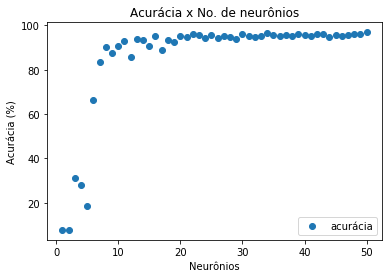

In [14]:
import matplotlib.pyplot as plt

#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

#params = {'figure.figsize': [10, 6], 
#          'axes.labelsize': 16,
#          'axes.titlesize':18, 
#          'font.size': 16,
#          'legend.fontsize': 12, 
#          'xtick.labelsize': 12, 
#          'ytick.labelsize': 12
#         }

#plt.rcParams.update(params)

neuronios = []
acuracias = []
erros = []
erros.append(((lista[0] - lista[1]) ** 2) * 100)

for i in range (50):
    neuronios.append(i+1)
    acuracias.append(lista[i]*100)
    if i>=1:
        erros.append(((lista[i-1] - lista[i]) ** 2) * 100)
        
#for i in range (50):
#    print(erro[i])
  
plt.scatter(neuronios, acuracias, label='acurácia')
plt.legend()
plt.title('Acurácia x No. de neurônios')
plt.xlabel('Neurônios')
plt.ylabel('Acurácia (%)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

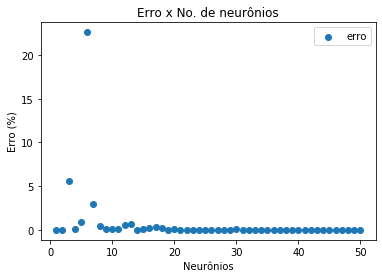

In [15]:
plt.scatter(neuronios, erros, label='erro')
plt.legend()
plt.title('Erro x No. de neurônios')
plt.xlabel('Neurônios')
plt.ylabel('Erro (%)')
plt.show
#plt.errorbar(x=neuronios, y=acuracias, yerr=erro, fmt='o')

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - LinearDiscriminantAnalysis](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

[Scikit-Learn - SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

[Scikit-Learn - MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)